### Import required modules

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

### Load the data

In [2]:
df = pd.read_csv('heart-disease-cleveland.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


### Clean the data (replace '?' with NaN, convert to numeric, fill missing values with median, and show info)

In [3]:
df = df.replace('?', np.nan)
df = df.apply(pd.to_numeric)
df = df.fillna(df.median())
print("--- Data types after cleaning ---")
df.info()

--- Data types after cleaning ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         303 non-null    int64  
 1    sex        303 non-null    int64  
 2    cp         303 non-null    int64  
 3    trestbps   303 non-null    int64  
 4    chol       303 non-null    int64  
 5    fbs        303 non-null    int64  
 6    restecg    303 non-null    int64  
 7    thalach    303 non-null    int64  
 8    exang      303 non-null    int64  
 9    oldpeak    303 non-null    float64
 10   slope      303 non-null    int64  
 11   ca         303 non-null    float64
 12   thal       303 non-null    float64
 13   diagnosis  303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


### Split the data into features (X) and target (y)

In [4]:
y = df[' diagnosis']
X = df.drop(' diagnosis', axis=1)

*Train/test split: using 20% of data for testing as per the 80-20 norm*

### Split the data into training and test sets

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

### Build and evaluate the Logistic Regression model

In [8]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(X_train, y_train)
y_log_reg_pred = log_reg.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, y_log_reg_pred)
print(f'Logistic Regression Test Accuracy: {log_reg_accuracy:.4f}')

Logistic Regression Test Accuracy: 0.7049


C:\coding\MLmodel\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 10000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=10000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Build and evaluate the Random Forest Classifier

In [9]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=100)
rf_clf.fit(X_train, y_train)
y_rf_clf_pred = rf_clf.predict(X_test)
rf_clf_accuracy = accuracy_score(y_test, y_rf_clf_pred)
print(f'Random Forest Classifier Test Accuracy: {rf_clf_accuracy:.4f}')

Random Forest Classifier Test Accuracy: 0.6230


### noe we are plotting the importances from the Random Forest model

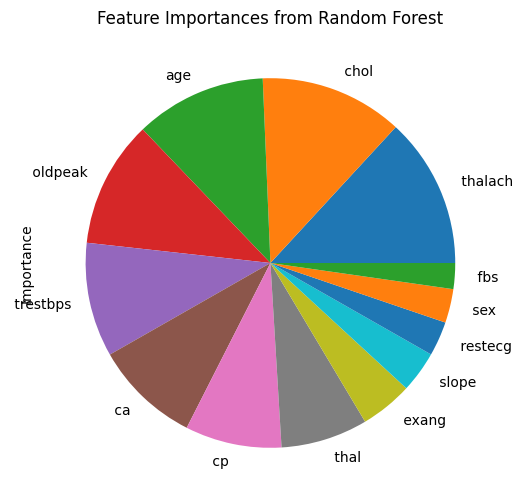

In [17]:
importances = rf_clf.feature_importances_
feature_names = X.columns
feature_importance_series = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importance_series.plot(kind='pie')
plt.title('Feature Importances from Random Forest')
plt.ylabel('Importance')
plt.show()

##performance on the 20% test set ie this is the overall accuracy of my machine learning model

In [13]:
print(f'\n--- Performance on the 20% TEST Set (for comparison) ---')
print(f'Logistic Regression Test Accuracy: {log_reg_accuracy:.4f}')
print(f'Random Forest Test Accuracy: {rf_clf_accuracy:.4f}')


--- Performance on the 20% TEST Set (for comparison) ---
Logistic Regression Test Accuracy: 0.7049
Random Forest Test Accuracy: 0.6230
